In [29]:
import pandas as pd
import numpy as np

In [30]:
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

x_train = train_set.drop(['median_house_value'], axis=1)
y_train = train_set['median_house_value']

x_test = test_set.drop(['median_house_value'], axis=1)
y_test = test_set['median_house_value']

In [32]:
x_train,x_test,y_train,y_test=np.array(x_train),np.array(x_test),np.array(y_train),np.array(y_test)

In [33]:
x_train,y_train

(array([[0.19920319, 0.8522848 , 0.29411765, ..., 0.        , 0.39576547,
         0.22952333],
        [0.27290837, 0.48034006, 0.39215686, ..., 0.        , 0.54013705,
         0.20534144],
        [0.81673307, 0.17003188, 0.33333333, ..., 0.        , 0.4108747 ,
         0.28294329],
        ...,
        [0.19023904, 0.55047821, 0.92156863, ..., 0.        , 0.39696106,
         0.21041548],
        [0.33964143, 0.7098831 , 0.21568627, ..., 0.        , 0.43656716,
         0.24256673],
        [0.66733068, 0.17003188, 0.15686275, ..., 0.        , 0.76802721,
         0.18645101]]),
 array([ 81600., 386800.,  82600., ..., 268500., 153800., 406700.]))

In [34]:
def cost(w,b):
    cost=0
    for i in range(len(x_train)):
        cost+=(np.dot(w,x_train[i])+b-y_train[i])**2
    return cost/2*len(x_train)

In [35]:
def derivative_x(w,b,j):
    derivative=0
    for i in range(len(x_train)):
        derivative+=(np.dot(w,x_train[i])+b-y_train[i])*(x_train[i][j])
    return derivative/len(x_train)

def derivative_b(w,b):
    derivative=0
    for i in range(len(x_train)):
        derivative+=(np.dot(x_train[i],w)+b-y_train[i])
    return derivative/len(x_train)

In [36]:
def gradient_decent(w,b,lr):
    w_new=w
    b_new=b
    for j in range(len(x_train[0])):
        w_new[j]=w_new[j]-lr*(derivative_x(w,b,j))
    b_new=b_new-lr*derivative_b(w,b)
    return w_new,b_new

In [37]:
w=[0]*12
b=0
for epoch in range(1000):
    w,b=gradient_decent(w,b,5)
    if((epoch+1)%100==0):
        print("Epoch : ",epoch+1 ," , Cost : ",cost(w,b))

Epoch :  100  , Cost :  5.7107769085454784e+17
Epoch :  200  , Cost :  5.4487881190145645e+17
Epoch :  300  , Cost :  5.420048035040401e+17
Epoch :  400  , Cost :  5.381652420578757e+17
Epoch :  500  , Cost :  5.337801090720613e+17
Epoch :  600  , Cost :  5.292500515479922e+17
Epoch :  700  , Cost :  5.248386491738382e+17
Epoch :  800  , Cost :  5.207617966891789e+17
Epoch :  900  , Cost :  5.1717988509162816e+17
Epoch :  1000  , Cost :  5.1419344807440403e+17


In [38]:
y_hat=[0]*len(x_test)
for i in range(len(x_test)):
    y_hat[i]=np.dot(x_test[i],w)+b

In [40]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
print("Mean absolute error:", mean_absolute_error(y_test, y_hat))
print("Mean squared error:", mean_squared_error(y_test, y_hat))
print("R² score:", r2_score(y_test, y_hat))

Mean absolute error: 48606.383215916205
Mean squared error: 4624587345.479565
R² score: 0.6497544387489864


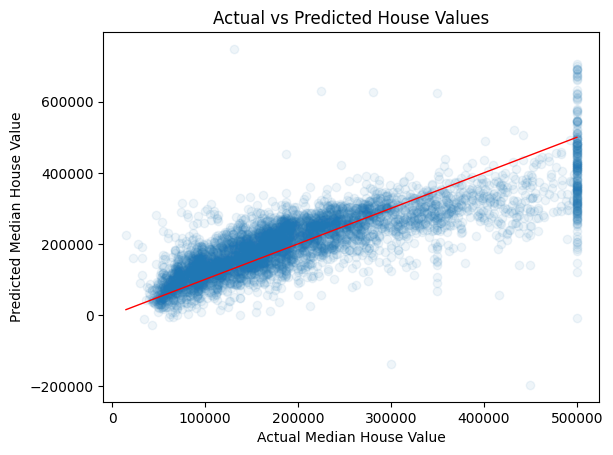

In [41]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_hat, alpha=0.07)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=1)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted House Values")
plt.show()